<a href="https://colab.research.google.com/github/taniahdez75/st/blob/main/Homework3_Tania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tania Hernandez - Homework 3

I created a generic dataset with a real situation I have in my daily work

Situation will be in a healthcare company setting.
We have 2 datasets, 
 -- one with member general information
 -- one with medical cost

 General Info:
 -- Age, Gender, diabetes flag, dementia flag, num indicator of housing insecurity, food insecurity, transportation insecurity asn social vulnerability index, a flag if the member is enrolled in CM, date of enrollment

 Medical Cost:
  -- member_id, period of the cost, total_cost, and claim types


Redifined the objective to get which features are relevant to estimate the risk level of each member.

Step 2 - Divided Numeric Values from Categorical Values. Remove date.
Step 3- Scale numerics and create dummies for Categoricals

Importance:

A) with Random Forest Classifier: Relevant variables were TranspInsecurity, Hosuing Insecurity, Food Insecurity, Age, and SVI factor.

 member_id    0.160536
14      TranspIns    0.154162
11     HousingIns    0.144553
12        FoodIns    0.135384
8             age    0.128958
13      SVIFactor    0.125642
16           cost    0.040105
10       dementia    0.031722
15             CM    0.027712
9        diabetes    0.022168
1           sex_M    0.013402
0           sex_F    0.009671
5   claim_type_IP    0.001677
4   claim_type_ER    0.001557
6   claim_type_RX    0.001160
2      period_POS    0.000858
3      period_PRE    0.000731


B- with Permutations age and food insecurity were the less important.

C- with the  logistic regression method, shorter columns were Diabetes, dementia, age, claim_type are the ones with less importance


In a real situation I will remove a few columns with the less importance and rerun the model to compare results.

In [34]:
#Feature Importance
#Dataframe for CAse MAnangement Evaluation
import pandas as pd
import numpy as np
import requests

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#MAchine learning model
from sklearn .linear_model import LogisticRegression




In [35]:
#Creating Member Data

import numpy as np
import pandas as pd
import datetime

# Define the number of records
num_records = 1000

# Define member_id as a sequence of integers
member_id = list(range(1, num_records + 1))

# Define sex, age, diabetes and dementia as random variables
sex = np.random.choice(['M', 'F'], size=num_records)
age = np.random.normal(50, 10, size=num_records)
diabetes = np.random.choice([0, 1], size=num_records)
dementia = np.random.choice([0, 1], size=num_records)

#SDOH
HousingIns = np.random.uniform(low=1.0, high=10.0, size=num_records)
FoodIns = np.random.uniform(low=1.0, high=20.0, size=num_records)
SVIFactor = np.random.uniform(low=1.0, high=30.0, size=num_records)
TranspIns = np.random.uniform(low=1.0, high=40.0, size=num_records)

# Define case_management_date as a random date
start_date = '2019-01-01'
end_date = '2022-12-31'
case_management_date = pd.to_datetime(np.random.choice(pd.date_range(start=start_date, end=end_date), size=num_records))

# Define the CM flag column
CM = np.random.choice([0, 1], size=num_records)

# Define risk_level as a random variable
risk_level = np.random.choice(['High', 'Medium', 'Low', 'None'], size=num_records)

# Create a dataframe with the generated columns
data = {
    'member_id': member_id,
    'sex': sex,
    'age': age,
    'diabetes': diabetes,
    'dementia': dementia,
    'HousingIns':HousingIns,
    'FoodIns':FoodIns,
    'SVIFactor':SVIFactor,
    'TranspIns':TranspIns,
    'case_management_date': case_management_date,
    'CM': CM,
    'risk_level':risk_level
}

df = pd.DataFrame(data)

# Preview the dataframe
print(df.head())

   member_id sex        age  diabetes  dementia  HousingIns    FoodIns  \
0          1   M  45.217691         0         1    1.383515  14.061466   
1          2   F  61.096420         0         0    6.886903   6.207973   
2          3   F  40.636393         0         0    4.399141  12.709342   
3          4   F  63.704485         1         1    2.705061  14.105173   
4          5   M  51.333475         1         0    7.333744  18.374600   

   SVIFactor  TranspIns case_management_date  CM risk_level  
0  13.022920  38.154226           2022-10-07   0     Medium  
1  25.279004  20.862849           2022-03-02   0       None  
2  27.675680  25.441214           2020-10-04   1       None  
3  16.870478   7.098348           2022-01-14   0        Low  
4  27.566443  37.185255           2021-08-29   0        Low  


In [36]:
# Creating Cost Data
#Define the number of records
num_records1 = 10000

# Get a random selection of values in df1 column A
values_A = np.random.choice(df['member_id'], size=num_records)

# Define cost_before_CM and cost_after_CM as random amounts of money
cost = np.random.normal(500, 100, size=num_records1)

# Define claim_type as a random variable
claim_type = np.random.choice(['ER', 'IP', 'RX'], size=num_records1)
period = np.random.choice(['PRE', 'POS'], size=num_records1)
  
# Create a dataframe with the generated columns
data = {
    'member_id':np.random.choice(values_A, size=num_records1),
    'period':period,
    'cost': cost,
    'claim_type': claim_type
}

df1 = pd.DataFrame(data)

# Preview the dataframe
print(df1.head())

   member_id period        cost claim_type
0        686    PRE  426.154260         IP
1        492    PRE  277.358936         RX
2        456    POS  441.900354         IP
3        617    PRE  294.683195         ER
4        639    PRE  475.695922         RX


In [37]:
# group by id, p, and ct and sum c
df2 = df1.groupby(['member_id', 'period', 'claim_type'], as_index=False)['cost'].sum()


In [38]:
# perform left join
df_left_join = pd.merge(df, df2, on='member_id', how='left')

# print result
print(df_left_join)

      member_id sex        age  diabetes  dementia  HousingIns    FoodIns  \
0             1   M  45.217691         0         1    1.383515  14.061466   
1             2   F  61.096420         0         0    6.886903   6.207973   
2             3   F  40.636393         0         0    4.399141  12.709342   
3             3   F  40.636393         0         0    4.399141  12.709342   
4             4   F  63.704485         1         1    2.705061  14.105173   
...         ...  ..        ...       ...       ...         ...        ...   
3709       1000   F  45.730441         0         0    9.991314  19.460572   
3710       1000   F  45.730441         0         0    9.991314  19.460572   
3711       1000   F  45.730441         0         0    9.991314  19.460572   
3712       1000   F  45.730441         0         0    9.991314  19.460572   
3713       1000   F  45.730441         0         0    9.991314  19.460572   

      SVIFactor  TranspIns case_management_date  CM risk_level period  \
0 

In [39]:
df_left_join.sample(5)

,member_id,sex,age,diabetes,dementia,HousingIns,FoodIns,SVIFactor,TranspIns,case_management_date,CM,risk_level,period,claim_type,cost
1404,390,M,47.550297,0,1,4.965513,8.178932,6.638518,20.430650,2021-11-24,0,Low,POS,IP,1084.728923
2935,784,F,56.743334,0,0,6.692511,5.387241,21.751538,5.883276,2022-07-28,1,Medium,PRE,ER,1185.332056
2583,691,F,41.210640,0,1,3.939928,1.106732,1.189341,4.648118,2020-06-29,1,Medium,POS,ER,1303.593034
325,92,F,52.456690,1,1,7.189458,18.768625,15.428215,23.262697,2019-01-10,1,Low,PRE,IP,746.101415
737,205,M,50.902646,0,0,8.431908,11.946285,15.707415,37.130991,2021-11-29,1,Medium,POS,RX,472.358703


In [40]:
df_left_join.isnull().sum()


member_id                 0
sex                       0
age                       0
diabetes                  0
dementia                  0
HousingIns                0
FoodIns                   0
SVIFactor                 0
TranspIns                 0
case_management_date      0
CM                        0
risk_level                0
period                  371
claim_type              371
cost                    371
dtype: int64

In [43]:
df=df_left_join
df = df.dropna(subset=['period'])
df.sample(5)

,member_id,sex,age,diabetes,dementia,HousingIns,FoodIns,SVIFactor,TranspIns,case_management_date,CM,risk_level,period,claim_type,cost
677,186,F,44.903056,1,0,2.682854,7.407978,2.733855,6.935111,2022-01-09,0,High,PRE,IP,2146.258445
2422,650,F,48.421966,1,1,4.183431,14.908487,3.755653,23.431860,2020-12-02,0,Low,POS,RX,2347.193147
3124,837,F,69.832240,0,1,9.976404,12.372507,11.392689,18.130476,2022-12-04,0,Medium,POS,ER,1444.158307
3215,859,F,43.009578,0,1,2.550732,11.642291,12.315706,26.276918,2021-10-04,0,High,POS,RX,622.399145
510,139,F,59.532670,1,1,3.297564,11.267387,29.003303,14.921342,2022-06-12,1,Medium,PRE,RX,2535.047679


In [50]:
df=df.drop('case_management_date',axis=1)

In [51]:
df.isnull().sum()

member_id     0
sex           0
age           0
diabetes      0
dementia      0
HousingIns    0
FoodIns       0
SVIFactor     0
TranspIns     0
CM            0
risk_level    0
period        0
claim_type    0
cost          0
dtype: int64

In [52]:
df.nunique()

member_id      629
sex              2
age            629
diabetes         2
dementia         2
HousingIns     629
FoodIns        629
SVIFactor      629
TranspIns      629
CM               2
risk_level       4
period           2
claim_type       3
cost          3343
dtype: int64

In [65]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()

In [54]:
df.dtypes

member_id       int64
sex            object
age           float64
diabetes        int64
dementia        int64
HousingIns    float64
FoodIns       float64
SVIFactor     float64
TranspIns     float64
CM              int64
risk_level     object
period         object
claim_type     object
cost          float64
dtype: object

In [59]:
numerics=['int64','float64']
catDF= df.select_dtypes(exclude=numerics)
numDF= df.select_dtypes(include=numerics)

In [56]:
catDF.head()

,sex,risk_level,period,claim_type
2,F,None,POS,RX
3,F,None,PRE,ER
6,M,None,POS,ER
7,M,None,POS,IP
8,M,None,POS,RX


In [70]:
#Scale all numeric column
#numeric_cols = df.select_dtypes(include=['int', 'float']).columns
numDF = pd.DataFrame(scaler.fit_transform(numDF.values),columns=numDF.columns,index=numDF.index)
#scaled_df = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols, index=df.index)
numDF.head()

,member_id,age,diabetes,dementia,HousingIns,FoodIns,SVIFactor,TranspIns,CM,cost
2,-1.050420,-0.787935,0.0,0.0,-0.229331,0.270062,0.928928,0.225341,0.0,-0.669774
3,-1.050420,-0.787935,0.0,0.0,-0.229331,0.270062,0.928928,0.225341,0.0,-0.176453
6,-1.044118,0.419108,1.0,1.0,-0.750772,0.498780,-0.535942,-0.344083,0.0,1.792717
7,-1.044118,0.419108,1.0,1.0,-0.750772,0.498780,-0.535942,-0.344083,0.0,0.586307
8,-1.044118,0.419108,1.0,1.0,-0.750772,0.498780,-0.535942,-0.344083,0.0,1.559697


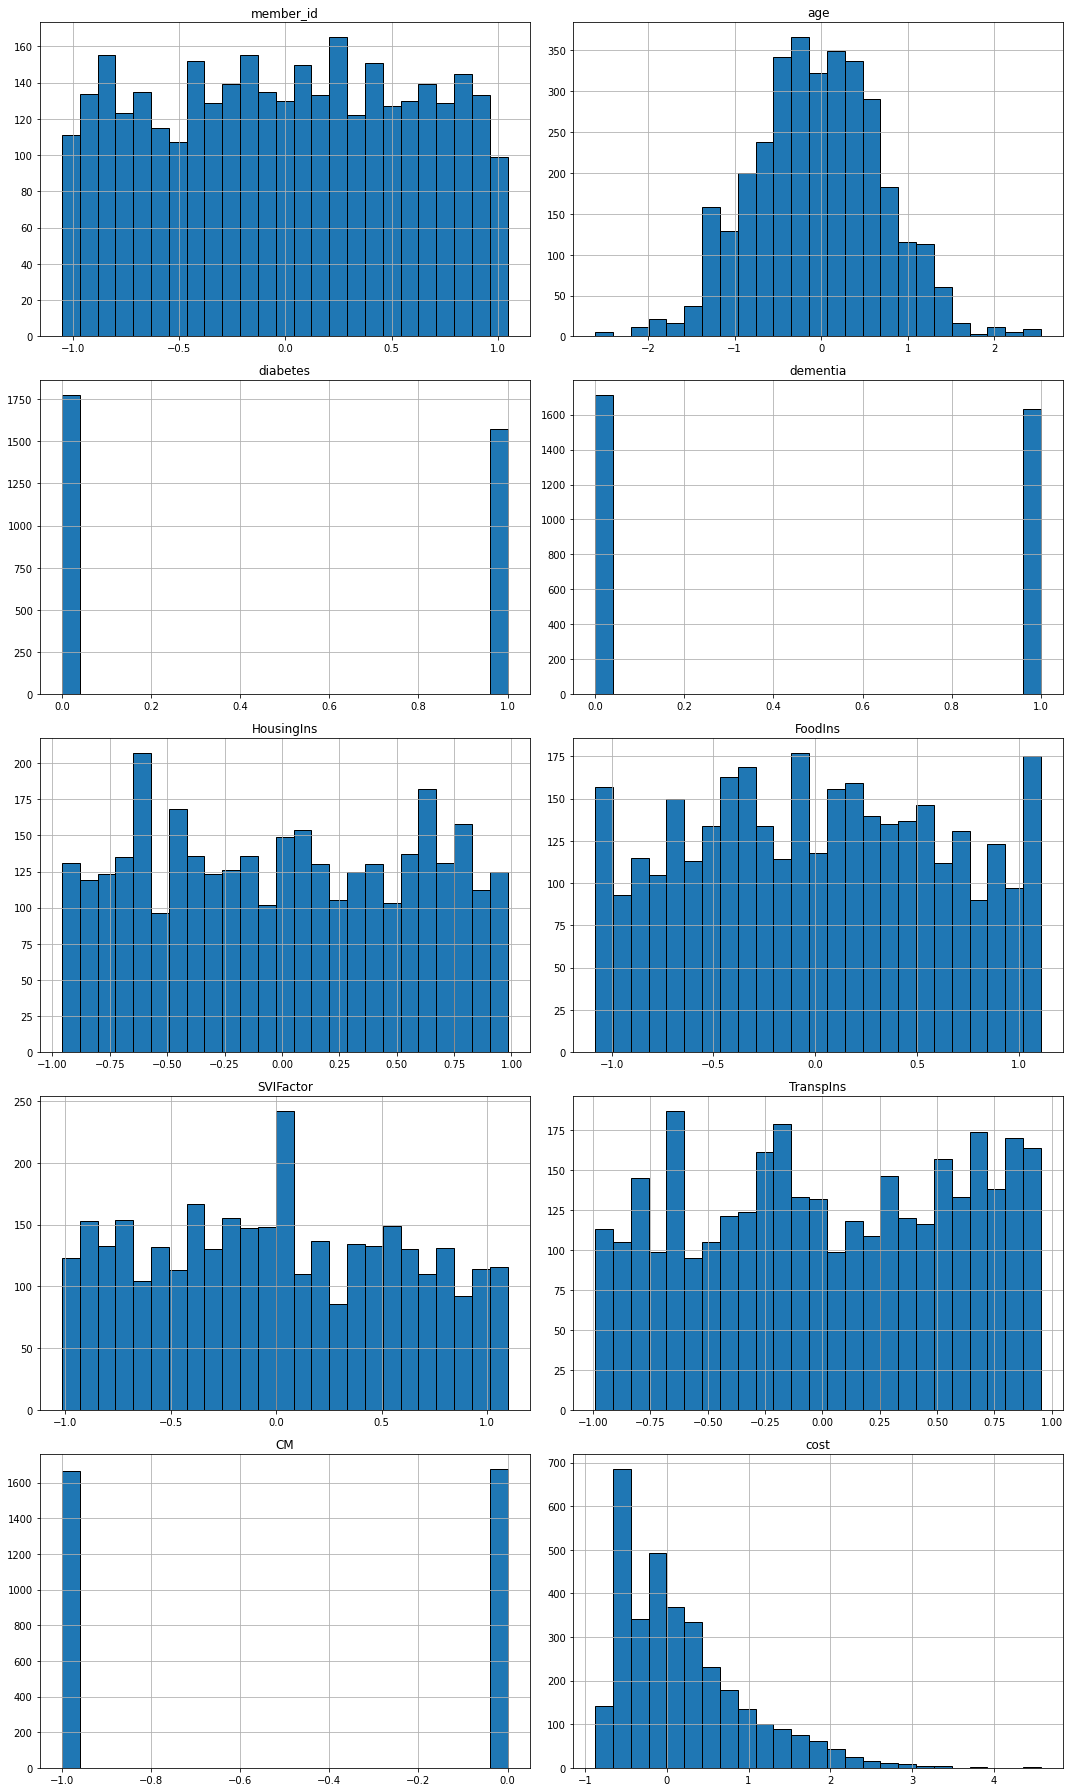

In [73]:
#Feature Distribution
numDF.hist(bins=25, figsize=(15, 25), layout=(-1, 2), edgecolor="black")
plt.tight_layout()
plt.show()

In [79]:
catDF.drop(['risk_level'],axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [82]:
catDF.head()

,sex,period,claim_type
2,F,POS,RX
3,F,PRE,ER
6,M,POS,ER
7,M,POS,IP
8,M,POS,RX


In [84]:
catDF=pd.get_dummies(catDF)

In [86]:
catDF.head()

,sex_F,sex_M,period_POS,period_PRE,claim_type_ER,claim_type_IP,claim_type_RX
2,1,0,1,0,0,0,1
3,1,0,0,1,1,0,0
6,0,1,1,0,1,0,0
7,0,1,1,0,0,1,0
8,0,1,1,0,0,0,1


In [91]:
#MErge

X=pd.concat([catDF,numDF], axis=1)
print(X.shape)
#Prepare Y
Y=df['risk_level']

(3343, 17)


In [93]:
Y=Y.replace(to_replace=['High','Medium','Low','None'],value=[0,1,2,3])
Y.head()

2    3
3    3
6    3
7    3
8    3
Name: risk_level, dtype: int64

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=100,stratify=Y)


In [98]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=5, random_state=43, n_estimators=300).fit(X_train, y_train)
rf.feature_importances_
feature_importances=pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})

#sort
feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)

          feature  importance
7       member_id    0.160536
14      TranspIns    0.154162
11     HousingIns    0.144553
12        FoodIns    0.135384
8             age    0.128958
13      SVIFactor    0.125642
16           cost    0.040105
10       dementia    0.031722
15             CM    0.027712
9        diabetes    0.022168
1           sex_M    0.013402
0           sex_F    0.009671
5   claim_type_IP    0.001677
4   claim_type_ER    0.001557
6   claim_type_RX    0.001160
2      period_POS    0.000858
3      period_PRE    0.000731


In [100]:
#Permutation

from sklearn.inspection import permutation_importance
r = permutation_importance(rf,X_test, y_test,
                         n_repeats=10,
                         random_state=0)
perm=pd.DataFrame(columns=['AVG_Importance','STD_Importance'],index=[i for i in X_train.columns])
perm['AVG_Importance']=r.importances_mean

In [101]:
print(perm.to_string())

               AVG_Importance STD_Importance
sex_F            1.635095e-02            NaN
sex_M            2.233300e-02            NaN
period_POS       9.970090e-04            NaN
period_PRE       0.000000e+00            NaN
claim_type_ER    8.973081e-04            NaN
claim_type_IP    3.330669e-17            NaN
claim_type_RX   -2.991027e-04            NaN
member_id        1.051844e-01            NaN
age              9.242273e-02            NaN
diabetes         3.409771e-02            NaN
dementia         3.948156e-02            NaN
HousingIns       1.018943e-01            NaN
FoodIns          1.094716e-01            NaN
SVIFactor        9.750748e-02            NaN
TranspIns        1.069791e-01            NaN
CM               3.629113e-02            NaN
cost             4.440892e-17            NaN


In [103]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(X,Y)

KNeighborsClassifier()

In [104]:
results=permutation_importance(kn,X_test,y_test,n_repeats=10,random_state=0)

Feature: 0 - Score: sex_F
Feature: 1 - Score: sex_M
Feature: 2 - Score: period_POS
Feature: 3 - Score: period_PRE
Feature: 4 - Score: claim_type_ER
Feature: 5 - Score: claim_type_IP
Feature: 6 - Score: claim_type_RX
Feature: 7 - Score: member_id
Feature: 8 - Score: age
Feature: 9 - Score: diabetes
Feature: 10 - Score: dementia
Feature: 11 - Score: HousingIns
Feature: 12 - Score: FoodIns
Feature: 13 - Score: SVIFactor
Feature: 14 - Score: TranspIns
Feature: 15 - Score: CM
Feature: 16 - Score: cost


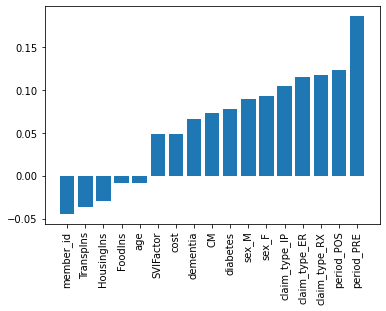

In [108]:
from matplotlib import pyplot
#imp
importance=feature_importances['importance']
importance=results.importances_mean
importance=np.sort(importance)

#get feat names
feature_names = feature_importances['feature']

#sum
for i, v in enumerate(importance):
    print('Feature: {} - Score: {}'.format(i, feature_names[i], v))

#plot
pyplot.bar([x for x in range(len(importance))],importance)
pyplot.xticks(range(len(importance)),feature_names, rotation=90)
pyplot.show()

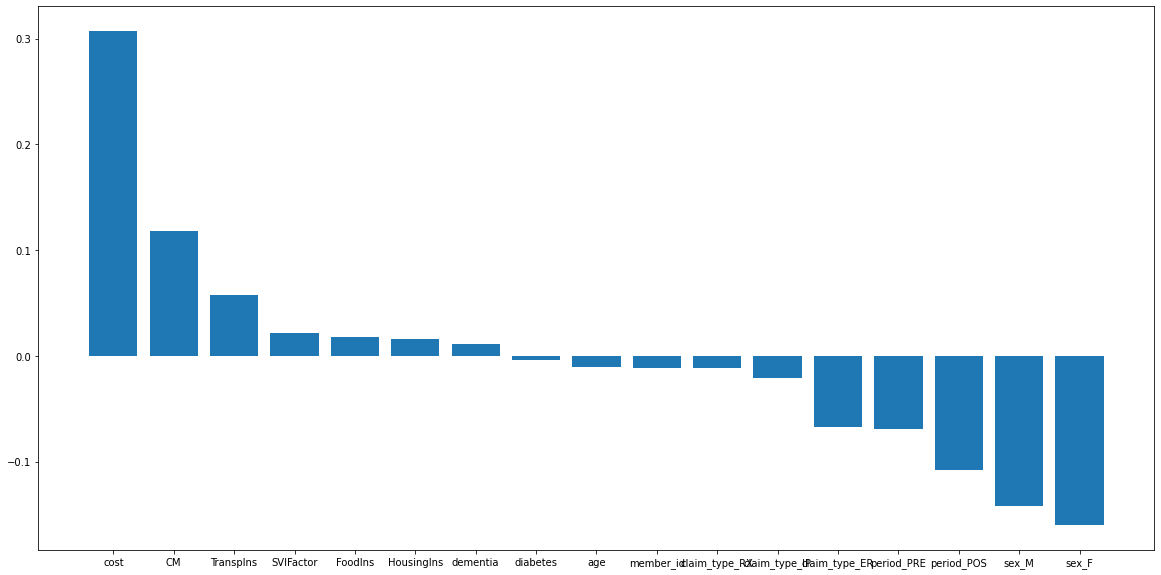

In [113]:
#Coefficients

model=LogisticRegression()
model.fit (X,Y)
importance= model.coef_[0]
importance=np.sort(importance)
importance
importance=pd.DataFrame({'feature':X.columns, 'importance': importance})
importance=importance.sort_values('importance',ascending=False)

#chart
plt.figure(figsize=(20,10))
plt.bar(importance['feature'], importance['importance'])
plt.show()

#for logistic regression this are the values that are considered important. We propably will remove the shorter columns for the model and compare results.
#Diabetes, dementia, age, claim_type are the ones with less importance